## Importing libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('magma_r')

## Exploring the Dataset :

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(df.shape)
print(df.isna().sum())

(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print(df['sex'].value_counts(), end='\n\n')
print(df['smoker'].value_counts(), end='\n\n')
print(df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


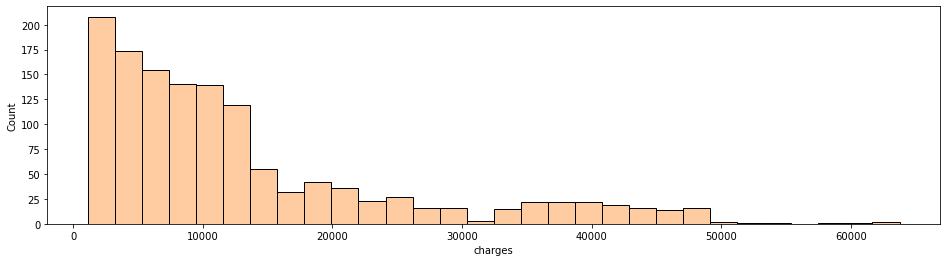

In [7]:
plt.figure(figsize=(16, 4))
sns.histplot(x=df['charges'])
plt.show()

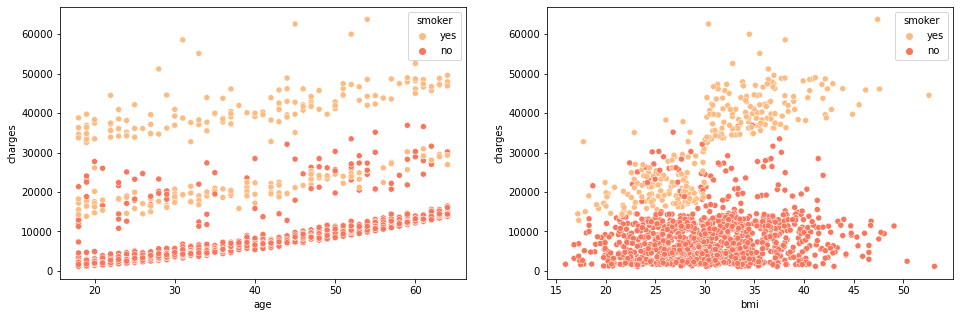

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(x=df['age'], y=df['charges'], hue=df['smoker'], ax=ax[0])
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'], ax=ax[1])
plt.show()

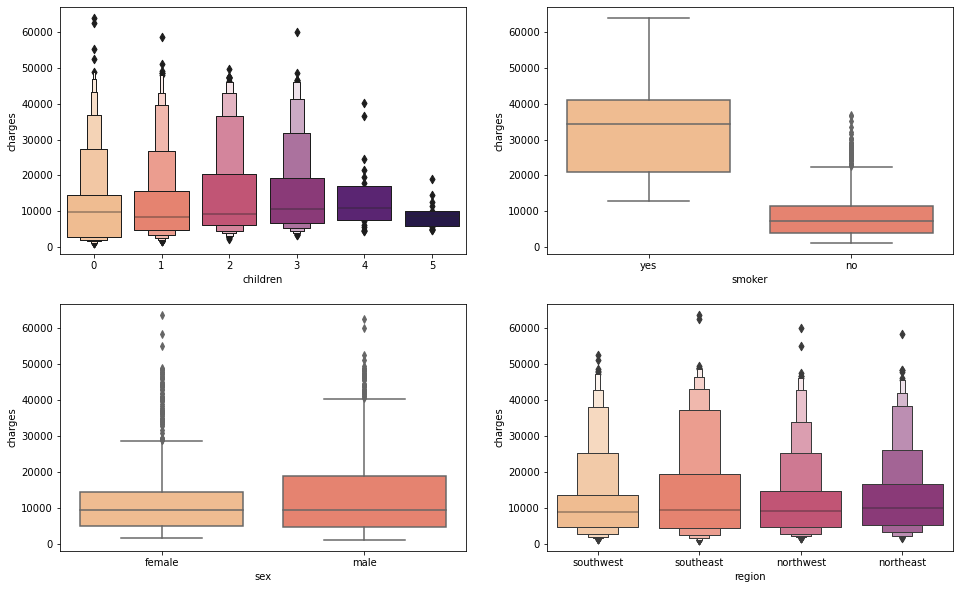

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.boxenplot(x=df['children'], y=df['charges'], ax=ax[0][0])
sns.boxplot(x=df['smoker'], y=df['charges'], ax=ax[0][1])
# plt.show()

# fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.boxplot(x=df['sex'], y=df['charges'], ax=ax[1][0])
sns.boxenplot(x=df['region'], y=df['charges'], ax=ax[1][1])
plt.show()

## Splitting the Dataset :

In [10]:
X = df.drop('charges', axis=1)
y = df['charges'].copy()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [12]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [13]:
print(X_train.shape)
print(y_train.shape)

(1070, 6)
(1070,)


## Feature processing :

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_attributes = ['sex', 'smoker', 'region']
num_attributes = ['age', 'bmi', 'children']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes),
])

piped_X_train = full_pipeline.fit_transform(X_train)
piped_X_test = full_pipeline.fit_transform(X_test)

In [15]:
piped_X_train

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

In [16]:
print(y_train.shape)
print(piped_X_train.shape)

(1070,)
(1070, 11)


## Evaluating different Models :

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(piped_X_train, y_train)
lin_reg.score(piped_X_train, y_train)

0.7417255854683333

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(piped_X_train, y_train)
tree_reg.score(piped_X_train, y_train)

0.9983078124756305

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(piped_X_train, y_train)
forest_reg.score(piped_X_train, y_train)

0.9749425574105988

In [20]:
regressors = [
    ('lin_reg', LinearRegression()),
    ('tree_reg', DecisionTreeRegressor(random_state=42)),
    ('forest_reg', RandomForestRegressor(n_estimators=100, random_state=42))
]

In [21]:
from sklearn.metrics import r2_score
for r_name, r in regressors:
    r.fit(piped_X_train, y_train)
    y_pred = r.predict(piped_X_test)
    accuracy = round(r2_score(y_test, y_pred), 2)
    result_df = pd.DataFrame(list(zip(y_test, y_pred)))
    print('{}: {}'.format(r_name, accuracy))

lin_reg: 0.78
tree_reg: 0.77
forest_reg: 0.86


In [22]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(piped_X_test)
lin_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('lin_rmse:', lin_rmse)

y_pred = tree_reg.predict(piped_X_test)
tree_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('tree_rmse:', tree_rmse)

y_pred = forest_reg.predict(piped_X_test)
forest_rmse = mean_squared_error(y_test, y_pred, squared=False)
print('forest_rmse:', forest_rmse)

lin_rmse: 5795.332533018758
tree_rmse: 6256.468540052871
forest_rmse: 4648.038441264737


## Fine tuning best Model :

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [4, 6, 8]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=4,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

grid_search.fit(piped_X_train, y_train)


GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [25]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [26]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

5715.235213972921 {'max_features': 4, 'n_estimators': 3}
5114.93561754783 {'max_features': 4, 'n_estimators': 10}
4922.741530531955 {'max_features': 4, 'n_estimators': 30}
5633.300547468165 {'max_features': 6, 'n_estimators': 3}
5111.1337995818585 {'max_features': 6, 'n_estimators': 10}
4912.9954928854895 {'max_features': 6, 'n_estimators': 30}
5385.559887176562 {'max_features': 8, 'n_estimators': 3}
5006.009247939206 {'max_features': 8, 'n_estimators': 10}
4845.703577046156 {'max_features': 8, 'n_estimators': 30}
5749.664659916568 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
5189.949037520507 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
5071.9035139438765 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
5745.796218691218 {'bootstrap': False, 'max_features': 6, 'n_estimators': 3}
5162.280333520314 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}
5069.2059502136635 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
5747.2367442

## Evaluating final Model :

In [27]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(piped_X_test)
final_rmse = mean_squared_error(y_test, final_pred, squared=False)
final_rmse

4445.216203268389

In [28]:
final_model.fit(piped_X_train, y_train)
y_pred = final_model.predict(piped_X_test)
accuracy = round(r2_score(y_test, y_pred), 2)
result_df = pd.DataFrame(list(zip(y_test, y_pred)))
print('R2 Score:', accuracy)

R2 Score: 0.87


In [29]:
result_df = pd.DataFrame(list(zip(y_test, final_pred)))
result_df.head(10)

,0,1
0,9095.06825,11423.219717
1,5272.17580,5836.560902
2,29330.98315,27878.020488
3,9301.89355,12879.952169
4,33750.29180,34815.250389
5,4536.25900,6168.549401
6,2117.33885,2264.020793
7,14210.53595,15204.424713
8,3732.62510,3930.183642
9,10264.44210,12896.721824


## Saving Models and Pipelines :

In [30]:
# import pickle

# with open('pickles/full_pipeline.sav') as f:
#     pickle.dump(full_pipeline, f)

# with open('pickles/final_model.sav') as f:
#     pickle.dump(final_model, f)